In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 200)

import joblib
import gc

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV ,StratifiedKFold, cross_val_score, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
import pickle


import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/clean data.csv')
# df = pd.read_csv('/content/drive/My Drive/cleaner data.csv')
# list(df.columns)

### Splitting into train and test set

In [5]:
columns_to_keep = [
# ['Unnamed: 0',
 'aantal_jaar_lid',
 'dispuut',
 'betalinsgregeling',
 'factuurbedrag',
 'aantal_regels',
 'hh_car',
 'leeftijd',
 'Target group',
 'storno_reden_(AC01) Onjuist rekeningnummer',
 'storno_reden_(AC04) Rekeningnummer gesloten',
 'storno_reden_(AC06) Euro incasso blokkade',
 'storno_reden_(AG01) Administratieve reden',
 'storno_reden_(AM04) Geen saldo',
 'storno_reden_(DNOR) Bic niet aangesloten',
 'storno_reden_(FF01) Fout bestandsformaat',
 'storno_reden_(MD01) Geen machtiging',
 'storno_reden_(MD06) Geïncasseerde heeft verzocht het geld terug te storten',
 'storno_reden_(MS02) Geweigerd door debiteur',
 'storno_reden_(MS03) Geweigerd door bank',
 'storno_reden_(RR01) Onjuiste incasso',
 'storno_reden_(SL01) Administratieve reden',
 'producten_A;KS;WE;',
 'producten_A;KS;WE;WEEW;',
 'producten_A;KS;WECW;',
 'producten_A;KS;WEEW;',
 'producten_A;KS;WNNW;WPEW;',
 'producten_A;KS;WPCW;',
 'producten_A;SMDR;WECW;',
 'producten_A;WE;',
 'producten_A;WE;WEEW;',
 'producten_A;WECW;',
 'producten_A;WECW;WEEW;',
 'producten_A;WECW;WNNW;',
 'producten_A;WEEW;',
 'producten_A;WEEW;WN;',
 'producten_A;WEEW;WNNW;',
 'producten_A;WPCW;',
 'producten_A;WPEW;',
 'producten_KS;SMDR;WEEW;',
 'producten_KS;WE;',
 'producten_KS;WE;WP;',
 'producten_KS;WECW;',
 'producten_KS;WEEW;',
 'producten_KS;WEEW;WN;',
 'producten_KS;WP;',
 'producten_KS;WPCW;',
 'producten_KS;WPEW;',
 'producten_SMDR;',
 'producten_SMDR;WE;',
 'producten_SMDR;WECW;',
 'producten_SMDR;WECW;WEEW;',
 'producten_SMDR;WECW;WNCW;',
 'producten_SMDR;WEEW;',
 'producten_SMDR;WEEW;WNNW;',
 'producten_SMDR;WN;',
 'producten_SMDR;WNCW;',
 'producten_SMDR;WNNW;',
 'producten_SMDR;WNNW;WPEW;',
 'producten_SMDR;WPCW;',
 'producten_SMDR;WPEW;',
 'producten_WE;',
 'producten_WE;WECW;',
 'producten_WE;WEEW;',
 'producten_WE;WN;',
 'producten_WE;WNNW;',
 'producten_WECW;',
 'producten_WECW;WEEW;',
 'producten_WECW;WN;',
 'producten_WECW;WNCW;',
 'producten_WECW;WNNW;',
 'producten_WECW;WPCW;',
 'producten_WEEW;',
 'producten_WEEW;WN;',
 'producten_WEEW;WNCW;',
 'producten_WEEW;WNNW;',
 'producten_WEEW;WPCW;',
 'producten_WEEW;WPEW;',
 'producten_WN;',
 'producten_WN;WNCW;',
 'producten_WN;WNNW;',
 'producten_WNCW;',
 'producten_WNCW;WNNW;',
 'producten_WNCW;WPCW;',
 'producten_WNCW;WPEW;',
 'producten_WNNW;',
 'producten_WNNW;WP;',
 'producten_WNNW;WPCW;',
 'producten_WNNW;WPEW;',
 'producten_WP;',
 'producten_WP;WPCW;',
 'producten_WP;WPEW;',
 'producten_WPCW;',
 'producten_WPEW;',
 'whize_segment_Dromen en Rondkomen',
 'whize_segment_Gewoon Gemiddeld',
 'whize_segment_Gezellige Emptynesters',
 'whize_segment_Jong en Hoopvol',
 'whize_segment_Landelijke Vrijheid',
 'whize_segment_Luxe leven',
 'whize_segment_Plannen en Rennen',
 'whize_segment_Stedelijke Dynamiek',
 'whize_segment_Volks en Uitgesproken',
 'whize_segment_Zorgeloos en Actief',
 'whize_subsegment_Alledaagse appartementsbezitters',
 'whize_subsegment_Alledaagse ouderen',
 'whize_subsegment_Beginnende appartementshuurders',
 'whize_subsegment_Beginnende stadskopers',
 'whize_subsegment_Buitenleven met kinderen',
 'whize_subsegment_Buitenleven met schoolverlaters',
 'whize_subsegment_CarriÃ¨re starters',
 'whize_subsegment_CarriÃ¨remakers met kids',
 'whize_subsegment_CarriÃ¨remakers met peuters',
 'whize_subsegment_CarriÃ¨remakers met pubers',
 'whize_subsegment_CarriÃ¨remakers met schoolverlaters',
 'whize_subsegment_CarriÃ¨remakers zonder kids',
 'whize_subsegment_Comfortabel en alledaags',
 'whize_subsegment_Comfortabele appartementsgenieters',
 'whize_subsegment_Eenvoudig buitenleven',
 'whize_subsegment_Eenvoudig en alledaags',
 'whize_subsegment_Eenvoudige Buurtkopers',
 'whize_subsegment_Exclusief gezinsleven',
 'whize_subsegment_Exclusief stadsleven',
 'whize_subsegment_Exclusieve elite',
 'whize_subsegment_Exclusieve senioren',
 'whize_subsegment_Genietende ouderen',
 'whize_subsegment_Gevestigde stedelingen',
 'whize_subsegment_Gevorderde huurgezinnen',
 'whize_subsegment_Gevorderde succesgezinnen',
 'whize_subsegment_Grootstedelijke gezinsdrukte',
 'whize_subsegment_Hip en stads',
 'whize_subsegment_Jong en exclusief',
 'whize_subsegment_Jong en modaal',
 'whize_subsegment_Jonge huurgezinnen',
 'whize_subsegment_Jonge rijtjessenioren',
 'whize_subsegment_Jonge succesgezinnen',
 'whize_subsegment_Jonger buitenleven',
 'whize_subsegment_Kopende starters',
 'whize_subsegment_Krap en ongebonden',
 'whize_subsegment_Krap en op leeftijd',
 'whize_subsegment_Krap met kids',
 'whize_subsegment_Krap met pubers',
 'whize_subsegment_Middelbaar en modaal',
 'whize_subsegment_Middelbare appartementshuurders',
 'whize_subsegment_Middelbare buurthuurders',
 'whize_subsegment_Modaal met kids',
 'whize_subsegment_Modaal met peuters',
 'whize_subsegment_Modaal met pubers',
 'whize_subsegment_Modaal met schoolverlaters',
 'whize_subsegment_Oude rijtjessenioren',
 'whize_subsegment_Ouder buitenleven',
 'whize_subsegment_Single buurthuurders',
 'whize_subsegment_Sobere appartementssenioren',
 'whize_subsegment_Stadse cultuurgenieters',
 'whize_subsegment_Stadse koopgezinnen',
 'whize_subsegment_Starters zonder centen',
 'whize_subsegment_Succesvol buitenleven',
 'whize_subsegment_Succesvolle levensgenieters',
 'whize_subsegment_Tevreden appartementssenioren',
 'whize_subsegment_Vliegende starters',
 'whize_subsegment_Weids buitenleven',
 'whize_subsegment_Werken en genieten',
 'werksituatie_Gepensioneerd',
 'werksituatie_Part-time',
 'werksituatie_Student',
 'werksituatie_Zonder baan',
 'gezinsinkomen_2 keer modaal',
 'gezinsinkomen_Beneden modaal',
 'gezinsinkomen_Boven modaal',
 'gezinsinkomen_Meer dan 2 keer modaal',
 'huishoudgrootte_2',
 'huishoudgrootte_3',
 'huishoudgrootte_4',
 'huishoudgrootte_5']

df = df[columns_to_keep]

In [6]:
y = df['Target group'] 
X = df.drop(columns=['Target group'])

X['aantal_jaar_lid']=X['aantal_jaar_lid'].astype(np.int32)
X['leeftijd']=X['leeftijd'].astype(np.int32)
X['dispuut']=X['dispuut'].astype(np.int32)
X['betalinsgregeling']=X['betalinsgregeling'].astype(np.int32)
X['aantal_regels']=X['aantal_regels'].astype(np.int32)
X['hh_car']=X['hh_car'].astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=123)

In [ ]:
ptf= MinMaxScaler()
ptf.fit(X_train)
X_train = ptf.transform(X_train)
X_test = ptf.transform(X_test)

### Logistic regression baseline

In [7]:
lr= LogisticRegression(random_state=123)
lr.fit(X_train, y_train) #training the model

y_pred = lr.predict(X_test)  #predicting on the validation set
# lr.score(X_val, y_val, scoring ='f1_weighted')

# calculting the baseline 
print ('The f1 score on the test set is:',f1_score(y_test, y_pred, average='weighted'))
print ('The accuracy score on the test set is:' , accuracy_score(y_test, y_pred ))
print()

y_predtrain = lr.predict(X_train)  #predicting on the validation set

# calculting the baseline 
print ('The f1 score on the train set is:',f1_score(y_train, y_predtrain, average='weighted'))
print ('The accuracy score on the train set is:' , accuracy_score(y_train, y_predtrain ))

# f1 score = Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
# This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

# pickle.dump(lr, open('lr_baseline.pkl', 'wb'))


The f1 score on the test set is: 0.2798250453279621
The accuracy score on the test set is: 0.4475285431052164

The f1 score on the train set is: 0.27905102800939696
The accuracy score on the train set is: 0.44697979694390316


In [ ]:
lr = pickle.load(open('lr_baseline.pkl', 'rb'))

In [ ]:
lrmat = plot_confusion_matrix(lr, X_test ,y_test, cmap=plt.cm.Blues, colorbar=False)
lrmat.ax_.set_title('Logistic Regression baseline')
plt.xlabel('Predicted group')
plt.ylabel('True group')
plt.gcf().set_size_inches(10,6)

plt.grid(False)
plt.savefig('lr_baseline_confusion.jpg', format="jpg")
plt.show()



### Random forest baseline

In [ ]:
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train) #training the model

y_pred = rf.predict(X_test)  #predicting on the test set

# evaluating & printing the scores
print ('The f1 score is:',f1_score(y_test, y_pred, average='weighted'))
print ('The accuracy score is:' , accuracy_score(y_test, y_pred )) 
print()

y_predtrain = rf.predict(X_train)  #predicting on the train set

# calculting the baseline 
print ('The f1 score on the test set is:',f1_score(y_train, y_predtrain, average='weighted'))
print ('The accuracy score on the test set is:' , accuracy_score(y_train, y_predtrain ))

# pickle.dump(lr, open('rf_baseline.pkl', 'wb'))

The f1 score is: 0.47506307364419903
The accuracy score is: 0.49210364394612705

The f1 score on the test set is: 0.8061695655488669
The accuracy score on the test set is: 0.808276074248795


In [ ]:
rf = pickle.load(open('rf_baseline.pkl', 'rb'))

In [ ]:
rfmat = plot_confusion_matrix(rf, X_test ,y_test, cmap=plt.cm.Blues, colorbar=False)
rfmat.ax_.set_title('Logistic Regression baseline')
plt.xlabel('Predicted group')
plt.ylabel('True group')
plt.gcf().set_size_inches(10,6)

plt.grid(False)
plt.savefig('rf_baseline_confusion.jpg', format="jpg")
plt.show()




### Model 1 Logistic regression + gridsearch + CV

In [ ]:
parameters = {
    'penalty' : ['l1','l2', 'elasticnet'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}

cv = StratifiedKFold(n_splits=5)


In [ ]:
%%time

gcv_lr = GridSearchCV(LogisticRegression(random_state=1, n_jobs=-1 ), parameters, cv=cv, refit=True, verbose=1, scoring='f1_weighted')
gcv_lr.fit(X_train,y_train)
print('Best estimators: ',gcv_lr.best_estimator_)
print('best score after gridsearch: ' + str(round(gcv_lr.best_score_,2)))


# pickle.dump(gcv_lr, open('lr_gridcv.pkl', 'wb'))

Fitting 5 folds for each of 63 candidates, totalling 315 fits
Best estimators:  LogisticRegression(C=10.0, n_jobs=-1, random_state=1)
best score after gridsearch: 0.29
Wall time: 5h 14min 27s


In [13]:
gcv_lr = pickle.load(open('/content/drive/My Drive/lr_gridcv.pkl', 'rb'))
print('Best estimators: ',gcv_lr.best_estimator_)
print('best score after gridsearch: ' + str(round(gcv_lr.best_score_,2)))

Best estimators:  LogisticRegression(C=10.0, n_jobs=-1, random_state=1)
best score after gridsearch: 0.29


In [14]:
mod1 =  LogisticRegression(**gcv_lr.best_params_)
mod1.fit(X_train, y_train) #training the model

y_pred = mod1.predict(X_test)  #predicting on the validation set

# evaluating & printing the scores
print ('The f1 score is:',f1_score(y_test, y_pred, average='weighted'))
print ('The accuracy score is:' , accuracy_score(y_test, y_pred )) 
print()

y_predtrain = mod1.predict(X_train)  #predicting on the train set

# calculting the baseline 
print ('The f1 score on the train set is:',f1_score(y_train, y_predtrain, average='weighted'))
print ('The accuracy score on the train set is:' , accuracy_score(y_train, y_predtrain ))

# f1 score = Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
# This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

The f1 score is: 0.27849837723234505
The accuracy score is: 0.4471183427907295

The f1 score on the train set is: 0.27822780099495464
The accuracy score on the train set is: 0.44713362732027484


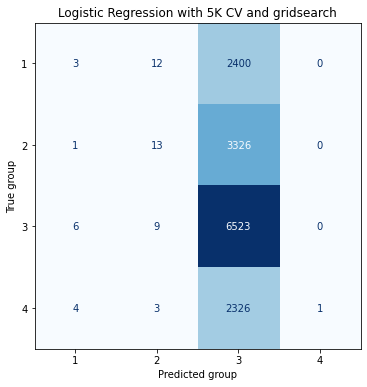

In [17]:
mod1mat = plot_confusion_matrix(mod1, X_test ,y_test, cmap=plt.cm.Blues, colorbar=False)
mod1mat.ax_.set_title('Logistic Regression with 5K CV and gridsearch')
plt.xlabel('Predicted group')
plt.ylabel('True group')
plt.gcf().set_size_inches(10,6)

plt.grid(False)
plt.savefig('/content/drive/My Drive/mod1_confusion.jpg', format="jpg")
plt.show()




### Model 2 Random forest + gridsearch + CV

In [ ]:
param_grid = {'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2', 0.5],
#     'max_depth' : [15, 16, 17],
    'criterion' :['gini', 'entropy'],
    'class_weight': ['balanced', None], 
    'min_samples_leaf': [1, 10] ,
    },

cv = StratifiedKFold(n_splits=5)

In [ ]:
%%time 
gcv_rf = GridSearchCV(RandomForestClassifier(random_state=1, n_jobs=-1 ), param_grid, cv=cv, refit=True, verbose=1, scoring='f1_weighted')
gcv_rf.fit(X_train,y_train)

pickle.dump(gcv_rf, open('rf_gridcv.pkl', 'wb')) 

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Wall time: 7h 3min 35s


In [19]:
gcv_rf = pickle.load(open('/content/drive/My Drive/rf_gridcv.pkl', 'rb'))
print('Best estimators: ',gcv_rf.best_estimator_)
print('best score after gridsearch: ' + str(round(gcv_lr.best_score_,2)))

Best estimators:  RandomForestClassifier(max_features=0.5, n_estimators=500, n_jobs=-1,
                       random_state=1)
best score after gridsearch: 0.29


In [20]:
mod2 =  RandomForestClassifier(**gcv_rf.best_params_)
mod2.fit(X_train, y_train) #training the model

y_pred = mod2.predict(X_test)  #predicting on the validation set

# evaluating & printing the scores
print ('The f1 score on the test set is:',f1_score(y_test, y_pred, average='weighted'))
print ('The accuracy score on the test set is:' , accuracy_score(y_test, y_pred )) 
print()

y_predtrain = mod2.predict(X_train)  #predicting on the train set

# calculting the baseline 
print ('The f1 score on the train set is:',f1_score(y_train, y_predtrain, average='weighted'))
print ('The accuracy score on the train set is:' , accuracy_score(y_train, y_predtrain ))

# f1 score = Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
# This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

The f1 score on the test set is: 0.4751305232637435
The accuracy score on the test set is: 0.4940862787994804

The f1 score on the train set is: 0.8056608670080037
The accuracy score on the train set is: 0.808276074248795


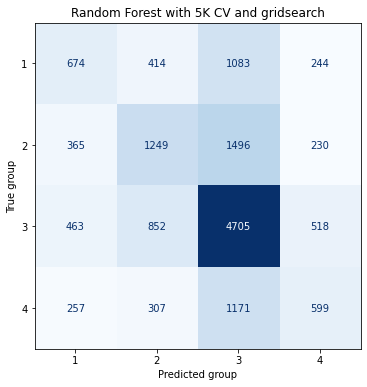

In [29]:
mod2mat = plot_confusion_matrix(mod2, X_test ,y_test, cmap=plt.cm.Blues, colorbar=False)
mod2mat.ax_.set_title('Random Forest with 5K CV and gridsearch')
plt.xlabel('Predicted group')
plt.ylabel('True group')
plt.gcf().set_size_inches(10,6)

plt.grid(False)
plt.savefig('/content/drive/My Drive/mod2_confusion.jpg', format="jpg")
plt.show()




In [ ]:
mod2_features = pd.Series(mod2.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# mod2_features = mod2.feature_importances_

(mod2_features[:10]*100)

leeftijd                        19.550400
factuurbedrag                   11.461239
aantal_jaar_lid                  7.986347
aantal_regels                    4.654762
hh_car                           3.487687
werksituatie_Part-time           3.059484
huishoudgrootte_2                2.819510
werksituatie_Zonder baan         2.357041
gezinsinkomen_Beneden modaal     2.139240
gezinsinkomen_Boven modaal       2.065723
dtype: float64

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

### Model 3 Logistic regression + SMOTE + gridsearch + CV

In [ ]:
%%time
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['model', LogisticRegression(random_state=123 )]])

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=11)
    
parameters = {
    'model__penalty' : ['l1','l2', 'elasticnet', None], 
    'model__C'       : np.logspace(-3,3,7),
    'model__solver'  : ['newton-cg', 'lbfgs', 'liblinear']}

lr_gcv_smote = GridSearchCV(estimator=pipeline,
                           param_grid=parameters,
                           scoring='f1_weighted',
                           cv=cv,
                           n_jobs=-1)

lr_gcv_smote.fit(X_train, y_train)
pickle.dump(lr_gcv_smote, open('lr_gridcv_smote.pkl', 'wb')) 


Wall time: 1h 41min 30s


In [22]:
mod3 = pickle.load(open('/content/drive/My Drive/lr_gridcv_smote.pkl', 'rb'))
print('Best estimators: ',gcv_rf.best_estimator_)
print('best score after gridsearch: ' + str(round(gcv_lr.best_score_,2)))

Best estimators:  RandomForestClassifier(max_features=0.5, n_estimators=500, n_jobs=-1,
                       random_state=1)
best score after gridsearch: 0.29


In [23]:
%%time
# mod3 =  lr_gcv_smote

y_pred = mod3.predict(X_test)  #predicting on the validation set

# evaluating & printing the scores
print ('The f1 score on the test set is:',f1_score(y_test, y_pred, average='weighted'))
print ('The accuracy score on the test set is:' , accuracy_score(y_test, y_pred )) 
print()

y_predtrain = mod3.predict(X_train)  #predicting on the train set

# calculting the baseline 
print ('The f1 score on the train set is:',f1_score(y_train, y_predtrain, average='weighted'))
print ('The accuracy score on the train set is:' , accuracy_score(y_train, y_predtrain ))

The f1 score on the test set is: 0.34275080222435833
The accuracy score on the test set is: 0.3725302522731934

The f1 score on the train set is: 0.3460135479839698
The accuracy score on the train set is: 0.37751683588008067
CPU times: user 226 ms, sys: 292 ms, total: 519 ms
Wall time: 195 ms


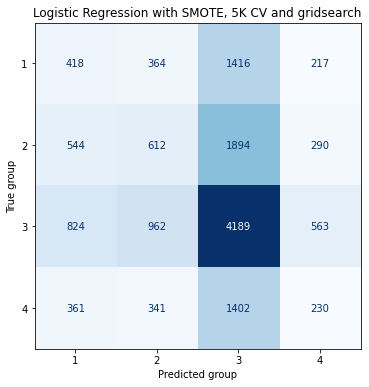

In [24]:
mod3mat = plot_confusion_matrix(mod3, X_test ,y_test, cmap=plt.cm.Blues, colorbar=False)
mod3mat.ax_.set_title('Logistic Regression with SMOTE, 5K CV and gridsearch')
plt.xlabel('Predicted group')
plt.ylabel('True group')
plt.gcf().set_size_inches(10,6)

plt.grid(False)
plt.savefig('/content/drive/My Drive/mod3_confusion.jpg', format="jpg")
plt.show()

### Model 4 Random forest + SMOTE + gridsearch + CV

In [25]:
mod4 = pickle.load(open('/content/drive/My Drive/rf_gridcv_smote.pkl', 'rb'))
print('Best estimators: ',mod4.best_estimator_)
print('best score after gridsearch: ' + str(round(mod4.best_score_,2)))

Best estimators:  Pipeline(steps=[('smote', SMOTE(random_state=11)),
                ['model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=17,
                                        max_features=0.5, n_estimators=500,
                                        random_state=123)]])
best score after gridsearch: 0.45


In [26]:
# mod4 =  RandomForestClassifier(**rf_gridcv_smote.best_params_)
# mod4.fit(X_train, y_train) #training the model

y_pred = mod4.predict(X_test)  #predicting on the validation set

# evaluating & printing the scores
print ('The f1 score on the test set is:',f1_score(y_test, y_pred, average='weighted'))
print ('The accuracy score on the test set is:' , accuracy_score(y_test, y_pred )) 
print()

y_predtrain = mod4.predict(X_train)  #predicting on the train set

# calculting the baseline 
print ('The f1 score on the train set is:',f1_score(y_train, y_predtrain, average='weighted'))
print ('The accuracy score on the train set is:' , accuracy_score(y_train, y_predtrain ))

The f1 score on the test set is: 0.4600784710249059
The accuracy score on the test set is: 0.4720721952553497

The f1 score on the train set is: 0.7310158169213545
The accuracy score on the train set is: 0.7331555737873039


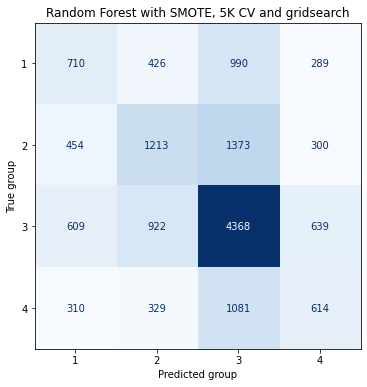

In [27]:
mod4mat = plot_confusion_matrix(mod4, X_test ,y_test, cmap=plt.cm.Blues, colorbar=False)
mod4mat.ax_.set_title('Random Forest with SMOTE, 5K CV and gridsearch')
plt.xlabel('Predicted group')
plt.ylabel('True group')
plt.gcf().set_size_inches(10,6)

plt.grid(False)
plt.savefig('/content/drive/My Drive/mod4_confusion.jpg', format="jpg")
plt.show()

In [ ]:
mod4_features = rf_gridcv_smote.feature_importances_

(mod4_features[:10]*100)

### Error analysis

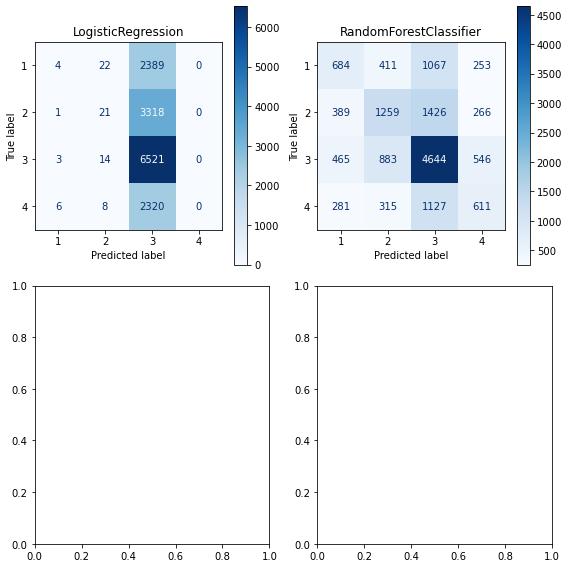

In [ ]:
# plotting  confusion matrices for baseline models
models = [ lr, rf]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for cls, ax in zip(models, axes.flatten()):
# for cls, ax in zip(models):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         )
    ax.title.set_text(type(cls).__name__)
    plt.tight_layout()  
plt.show()

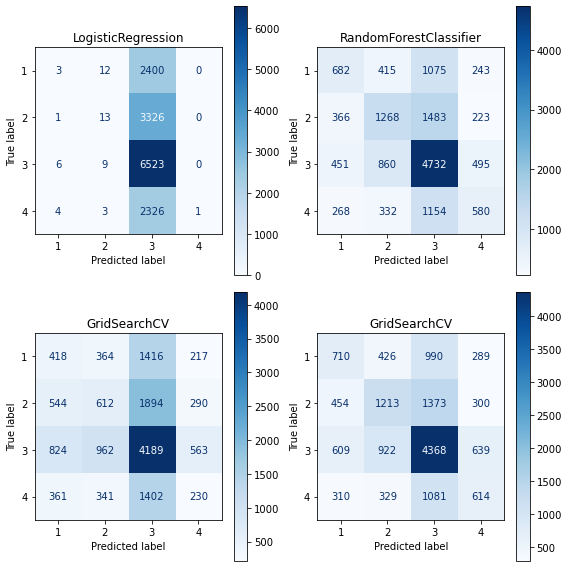

In [ ]:
# plotting all confusion matrices
models = [ mod1, mod2, mod3, mod4]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for cls, ax in zip(models, axes.flatten()):
# for cls, ax in zip(models):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         )
    ax.title.set_text(type(cls).__name__)
    plt.tight_layout()  
plt.show()